# Ημέρα 3 — Plotting (Matplotlib + Seaborn) & Mini‑EDA

Goal της ημέρας: Να φτιάχνεις καθαρά γραφήματα (διανομές, boxplots, bar/line), να τα αποθηκεύεις σε αρχεία και να κάνεις μια μικρή EDA ((exploratory data analysis)) πάνω στο δικό σου CSV.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (προαιρετικά στυλ)
plt.style.use("seaborn-v0_8")  # αν σου αρέσει το look
sns.set_theme()                 # βασική αισθητική seaborn


Φόρτωμα δεδομένων

In [3]:
df = pd.read_csv("transactions_sample.csv")

# αν υπάρχει 'class' (0/1) και θες φιλικό όνομα:
if "class" in df.columns and "is_fraud" not in df.columns:
    df["is_fraud"] = df["class"].astype(int)

# βεβαιώσου ότι το date είναι datetime
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")


- Ελέγχει:
Αν υπάρχει στήλη class στο CSV (π.χ. τιμή 0 = κανονική συναλλαγή, 1 = απάτη).
Αν ΔΕΝ υπάρχει ήδη στήλη με όνομα is_fraud.
- Αν ισχύουν, δημιουργεί μια νέα στήλη is_fraud:
Παίρνει τις τιμές από τη στήλη class.
Κάνει .astype(int) για να βεβαιωθεί ότι είναι ακέραιοι (0 ή 1).
- Έτσι το dataset γίνεται πιο «κατανοητό» (αντί για generic class, έχεις is_fraud).
👉 Αυτό είναι καλό practice: το is_fraud είναι πιο περιγραφικό όνομα από class.

- Αν υπάρχει στήλη date, τότε:
Την περνάει από τη συνάρτηση pd.to_datetime().
Αυτό μετατρέπει τα string (π.χ. "2023-06-01 12:30:45") σε datetime αντικείμενα της pandas → μπορείς να κάνεις φίλτρα όπως:
df[df["date"].dt.year == 2023]
df["date"].dt.month.value_counts()

- errors="coerce" σημαίνει:
Αν βρει μη-έγκυρη ημερομηνία (π.χ. "abc"), ΔΕΝ θα σκάσει με error.
Θα την κάνει NaT (Not a Time), που είναι το αντίστοιχο του NaN για ημερομηνίες.
👉 Αυτό είναι σημαντικό γιατί πολλές φορές datasets έχουν «χαλασμένα» ή «περίεργα» date strings.

- Tώρα το df είναι πιο έτοιμο για EDA (exploratory data analysis) ή για μοντελοποίηση (machine learning).

## 1. Matplotlib Quick Tour

### Line Plot

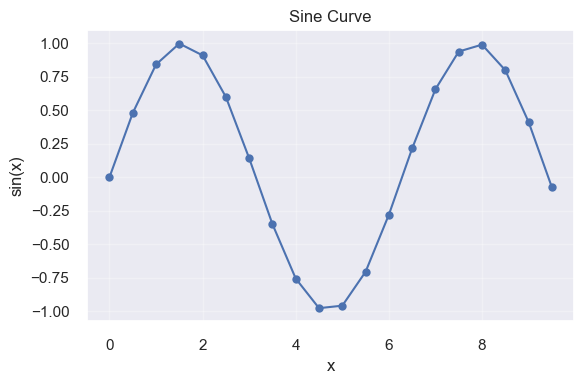

In [4]:
x = np.arange(0, 10, 0.5) # x από 0 έως 10 με βήμα 0.5
y = np.sin(x) # Υπολογίζει το ημίτονο για κάθε τιμή του x. Το αποτέλεσμα είναι ένας πίνακας y με τις τιμές της συνάρτησης sin(x).

plt.figure(figsize=(6,4)) # Δημιουργεί ένα νέο Figure αντικείμενο για το γράφημα με πλάτος 6 inches, ύψος 4 inches → ορίζει τις διαστάσεις του plot
plt.plot(x, y, marker="o") # Φτιάχνει γραμμικό γράφημα με άξονα Χ το x και άξονα Υ το y. marker="o" → βάζει κύκλους (markers) πάνω σε κάθε σημείο δεδομένων για να φαίνονται καθαρά.
plt.title("Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True, alpha=0.3) # πλέγμα (grid) για να διαβάζεται καλύτερα το γράφημα. alpha=0.3 κάνει το grid πιο «ελαφρύ» (30% διαφάνεια).
plt.tight_layout() # Προσαρμόζει αυτόματα margins & αποστάσεις ώστε να μην κόβονται labels/titles.
plt.show() # Εμφανίζει το γράφημα σε παράθυρο (σε Jupyter Notebook εμφανίζεται μέσα στο notebook).

### Scatter

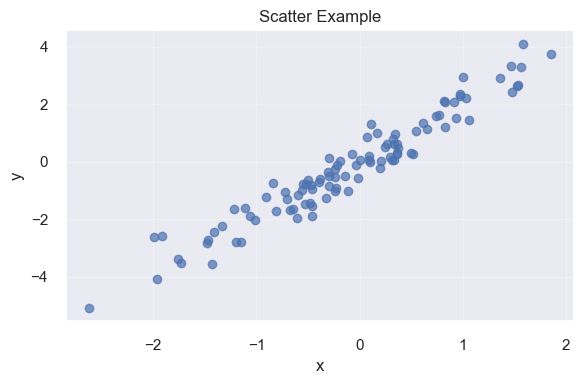

In [5]:
np.random.seed(42) # Ορίζει τον seed της γεννήτριας τυχαίων αριθμών. Έτσι κάθε φορά που τρέχεις τον κώδικα θα παίρνεις τα ίδια "τυχαία" αποτελέσματα (πολύ χρήσιμο για reproducibility στα notebooks)
x = np.random.randn(100) # Δημιουργεί 100 τυχαίους αριθμούς από την κανονική κατανομή (μέση τιμή 0, τυπική απόκλιση 1)
y = x * 2 + np.random.randn(100) * 0.5 # np.random.randn(100) * 0.5 → προσθέτει θόρυβο (noise) από κανονική κατανομή, με μικρή διασπορά (συντελεστής 0.5).

plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7) # alpha=0.7 κάνει τα σημεία ημιδιαφανή → αν επικαλύπτονται, φαίνεται η πυκνότητα
plt.title("Scatter Example")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.tight_layout() # Προσαρμόζει αυτόματα margins & αποστάσεις ώστε να μην κόβονται labels/titles.
plt.show()


Tα σημεία περίπου σχηματίζουν μια ευθεία γραμμή με κλίση 2, αλλά σκορπισμένα λόγω θορύβου. Αυτό προσομοιώνει γραμμική σχέση με τυχαίο σφάλμα (σαν δεδομένα για regression).

### Histogram (ποσά συναλλαγών)

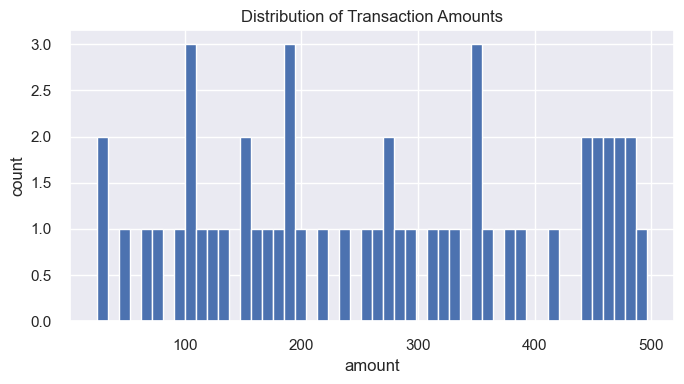

In [6]:
plt.figure(figsize=(7,4))
plt.hist(df["amount"], bins=50) 
# plt.hist = φτιάχνει ιστόγραμμα, δηλαδή χωρίζει τα δεδομένα σε κάδους (bins) και μετράει πόσες τιμές πέφτουν σε κάθε bin. 
# df["amount"] = η στήλη των ποσών.
# bins=50 = χωρίζει το εύρος σε 50 διαστήματα (μπάρες) → πιο λεπτομερής εικόνα της κατανομής. 
# Λίγα bins = πιο «χοντρή» εικόνα. 
# Πολλά bins = πιο «λεπτή» εικόνα, αλλά ίσως πιο θορυβώδης.
plt.title("Distribution of Transaction Amounts")
plt.xlabel("amount")
plt.ylabel("count")
plt.tight_layout()
plt.show()

### Αποθήκευση εικόνας

In [14]:
plt.figure(figsize=(7,4))
plt.hist(df["amount"], bins=50)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("amount")
plt.ylabel("count")
plt.tight_layout()
plt.savefig("../../images/week2/amount_hist.png", dpi=150, bbox_inches="tight") 
# dpi=150 = ανάλυση (dots per inch). Υψηλότερο DPI → πιο καθαρή εικόνα. bbox_inches="tight" = κόβει περιττά κενά γύρω από το γράφημα.
plt.close()

## 2. Seaborn Essentials

### Histplot με KDE

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df["amount"], bins=50, kde=True) 
# kde=True = βάζει και Kernel Density Estimate curve (μια «ομαλή» καμπύλη που εκτιμά την πιθανότητα κατανομής).Έτσι βλέπεις όχι μόνο τα counts σε bins, αλλά και την «συνεχή» κατανομή.
plt.title("Amount Distribution (with KDE)")
plt.tight_layout()
plt.savefig("../../images/week2/amount_hist_kde.png", dpi=150, bbox_inches="tight") 
# Αποθηκεύει το γράφημα ως PNG. dpi=150 = καθαρή ανάλυση (καλή για reports). bbox_inches="tight" = κόβει τα περιττά λευκά margins.
plt.close() # Κλείνει το figure ώστε να μην «κρατιέται» στη μνήμη (ιδανικό όταν φτιάχνεις πολλά plots σε σειρά).

### Boxplot: ποσό vs is_fraud

Το boxplot είναι χρήσιμο όταν θέλεις να συγκρίνεις την κατανομή ποσών (amount) ανά κατηγορία (fraud / not fraud).

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="is_fraud", y="amount") 
plt.title("Amount by Fraud Class")
plt.tight_layout()
plt.savefig("../../images/week2/amount_box_by_class.png", dpi=150, bbox_inches="tight")
plt.close()

Τι θα δεις
Δύο boxplots δίπλα-δίπλα:
Ένα για μη-απάτες (0).
Ένα για απάτες (1).
Θα μπορείς να συγκρίνεις αν οι απάτες έχουν τυπικά μεγαλύτερα ποσά ή περισσότερα outliers σε σχέση με τις κανονικές συναλλαγές.

### Countplot (class imbalance)

Δείχνεις με countplot πόσες συναλλαγές είναι fraud vs. non-fraud.

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="is_fraud") # countplot = μπαρ που δείχνει πόσες εγγραφές (counts) υπάρχουν για κάθε κατηγορία στην στήλη is_fraud (0 = non-fraud, 1 = fraud).
plt.title("Class Counts (is_fraud)")
plt.tight_layout()
plt.savefig("../../images/week2/class_count.png", dpi=150, bbox_inches="tight")
plt.close()

Τι θα δεις
Δύο μπάρες:
Η μία για τις μη-απάτες (0), συνήθως πολύ ψηλότερη.
Η άλλη για τις απάτες (1), συνήθως πολύ χαμηλότερη (dataset imbalance).

### Heatmap συσχετίσεων

In [ ]:
corr = df.corr(numeric_only=True) # Υπολογίζει τον πίνακα συσχετίσεων (correlation matrix) μόνο για τις αριθμητικές στήλες.
# Το αποτέλεσμα corr είναι DataFrame όπου: Διαγώνιος = πάντα 1 (κάθε στήλη με τον εαυτό της).
# Τιμές κοντά στο 1 = ισχυρή θετική συσχέτιση. Τιμές κοντά στο -1 = ισχυρή αρνητική συσχέτιση. Κοντά στο 0 = μικρή/καθόλου γραμμική συσχέτιση.
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False, cmap="viridis") # annot=False = δεν εμφανίζει αριθμούς πάνω στα κελιά (μόνο χρώμα). Αν έβαζες annot=True, θα έβλεπες και τις τιμές. 
# cmap="viridis" = colormap (πράσινο–μπλε–κίτρινο, πολύ καθαρό για data viz)
plt.title("Correlation Heatmap (numeric only)")
plt.tight_layout()
plt.savefig("../../images/week2/corr_heatmap.png", dpi=150, bbox_inches="tight")
plt.close()

Τι θα δεις
Ένα τετράγωνο grid με χρώματα.
Όσο πιο έντονο → τόσο πιο δυνατή η συσχέτιση.
Στήλες όπως amount, is_fraud, class (αν υπάρχει), μπορεί να δείχνουν patterns.

## 3. Mini‑EDA (exploratory data analysis)

### 3.1 Class imbalance: counts + ποσοστά

In [7]:
counts = df["is_fraud"].value_counts(dropna=False) # μετράει πόσες εγγραφές (counts) υπάρχουν για κάθε κατηγορία στην στήλη is_fraud (0 = non-fraud, 1 = fraud). dropna=False → μετράει και τα NaN αν υπάρχουν (χρήσιμο για να ξέρεις αν λείπουν labels).
ratios = df["is_fraud"].value_counts(normalize=True, dropna=False) # normalize=True → επιστρέφει αναλογίες (ratios) αντί για απόλυτους αριθμούς. Π.χ. αν έχεις 90 non-fraud και 10 fraud, θα επιστρέψει 0.9 και 0.1 αντίστοιχα.

display(counts)
display((ratios*100).round(2).astype(str) + "%")

# Γράφημα (το countplot αποθηκεύτηκε ήδη ως ../../images/week2/class_count.png)

is_fraud
0    41
1     9
Name: count, dtype: int64

is_fraud
0    82.0%
1    18.0%
Name: proportion, dtype: object

Tι κερδίζεις εδώ
Ξέρεις πόσα samples έχεις σε κάθε class.
Ξέρεις τι ποσοστό του dataset είναι fraud vs. non-fraud.
Αυτό είναι κρίσιμο γιατί συνήθως έχουμε class imbalance (fraud ~1–5%).
Και ήδη έχεις το αντίστοιχο countplot αποθηκευμένο σε εικόνα (class_count.png).

### 3.2 Κατανομή amounts (δοκίμασε log‑scale)

In [ ]:
# Linear Scale
plt.figure(figsize=(7,4))
sns.histplot(df["amount"], bins=50, kde=False)
plt.title("Amount Distribution (Linear Scale)")
plt.xlabel("amount")
plt.tight_layout()
plt.savefig("../../images/week2/amount_hist_linear.png", dpi=150, bbox_inches="tight")
plt.close()

# Log Scale (αν υπάρχουν long-tail amounts)
plt.figure(figsize=(7,4))
sns.histplot(df["amount"], bins=50, kde=False) 
plt.xscale("log")  # λογαριθμική κλίμακα στον άξονα Χ (plt.xscale("log")). 
# Αυτό είναι ιδανικό για datasets με long-tail διανομές (πολλές μικρές τιμές, λίγες πολύ μεγάλες). 
# Σου επιτρέπει να δεις καλύτερα τη δομή των δεδομένων, ειδικά τα μεσαία και μεγάλα ποσά.
plt.title("Amount Distribution (Log Scale)")
plt.xlabel("amount (log)")
plt.tight_layout()
plt.savefig("../../images/week2/amount_hist_log.png", dpi=150, bbox_inches="tight")
plt.close()


Τι θα δεις
Linear plot: οι μπάρες των μικρών amounts θα είναι πολύ ψηλές, και τα μεγάλα amounts θα φαίνονται σπάνια.
Log plot: οι συναλλαγές απλώνονται πιο «δίκαια» στον άξονα → μπορείς να δεις αν υπάρχει pattern στα μεγάλα ποσά.

### 3.3 Ώρα ημέρας (αν υπάρχει datetime)

Eδώ κάνεις feature engineering πάνω στο date και φτιάχνεις 2 πολύ χρήσιμα plots για χρονικά patterns.

*(Feature engineering is the process of transforming raw data into features that can be used to train and improve machine learning models, enhancing their accuracy and performance. It involves using domain knowledge to create, transform, and select input variables from raw data, which can include handling missing values, encoding categorical data, creating new interaction terms, and extracting relevant information. The goal is to provide models with a richer, more informative dataset, leading to better learning, more accurate predictions, and reduced overfitting.)*

In [ ]:
if "date" in df.columns:
    df["hour_of_day"] = df["date"].dt.hour # εξάγεις από κάθε timestamp την ώρα (0–23). Δημιουργείς νέα στήλη hour_of_day → χρησιμεύει για ανάλυση της δραστηριότητας μέσα στη μέρα

    # 📊 1ο Plot:
    # μέσο ποσό ανά ώρα
    hourly_mean = df.groupby("hour_of_day")["amount"].mean().reset_index() 
    # Ομαδοποιεί (groupby) με βάση την ώρα.
    # Υπολογίζει το μέσο ποσό συναλλαγής (mean).
    # reset_index() → κάνει την έξοδο πάλι DataFrame με κανονικές στήλες (hour_of_day, amount).

    plt.figure(figsize=(7,4))
    sns.barplot(data=hourly_mean, x="hour_of_day", y="amount")
    plt.title("Mean Amount per Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Mean Amount")
    plt.tight_layout()
    plt.savefig("../../images/week2/mean_amount_per_hour.png", dpi=150, bbox_inches="tight")
    plt.close()
    # Barplot με Seaborn → δείχνει τη μέση τιμή συναλλαγών σε κάθε ώρα της ημέρας.
    # Καλή οπτικοποίηση για να δεις αν π.χ. τα μεγάλα ποσά εμφανίζονται πιο συχνά βράδυ/πρωί.

    # 📊 2ο Plot:
    # πλήθος συναλλαγών ανά ώρα (προαιρετικά)
    hourly_count = df["hour_of_day"].value_counts().sort_index()
    # value_counts() → μετράει πόσες συναλλαγές έχει κάθε ώρα.
    # .sort_index() → τα ταξινομεί με τη φυσική σειρά των ωρών (0–23).
    plt.figure(figsize=(7,4))
    hourly_count.plot(kind="bar")
    plt.title("Transaction Count per Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("../../images/week2/count_per_hour.png", dpi=150, bbox_inches="tight")
    plt.close()
    # Bar chart (με Pandas .plot) → δείχνει το πλήθος συναλλαγών σε κάθε ώρα.
    # Έτσι βλέπεις πότε γίνονται οι περισσότερες συναλλαγές (π.χ. το μεσημέρι, το βράδυ).

Τι θα δεις
Πρώτο γράφημα: «Μέσο ποσό ανά ώρα». Αν δεις αιχμές σε κάποιες ώρες, μπορεί να σημαίνει ότι σε εκείνες τις ώρες γίνονται περισσότερες high-value συναλλαγές (σημαντικό για fraud patterns).
Δεύτερο γράφημα: «Πλήθος συναλλαγών ανά ώρα». Μπορεί να δείξει το «peak activity» (π.χ. πιο πολλές συναλλαγές γίνονται 9–11 το πρωί).

### 3.4 Συσχετίσεις (heatmap έχει αποθηκευτεί)

- Έλεγξε αν amount σχετίζεται με άλλες numeric στήλες (π.χ. is_fraud, merchant_id).
- Σημείωσε 2–3 πιο δυνατές θετικές/αρνητικές συσχετίσεις.

(Αφού έχεις ήδη αποθηκεύσει το heatmap, μπορείς να δεις και απευθείας τους αριθμούς από τον correlation matrix.)

In [ ]:
# Υπολογισμός correlation
corr = df.corr(numeric_only=True)
display(corr["amount"].sort_values(ascending=False))
# Αυτό σου εμφανίζει όλες τις συσχετίσεις της στήλης amount με τις υπόλοιπες numeric στήλες, ταξινομημένες από την πιο θετική προς την πιο αρνητική.

amount            1.000000
transaction_id    0.197261
class             0.078545
is_fraud          0.078545
merchant_id       0.030245
hour_of_day            NaN
Name: amount, dtype: float64

Γιατί είναι χρήσιμο;
Αν έχεις πολλές numeric στήλες, αυτή η γραμμή είναι shortcut για να δεις ποιες έχουν πιο δυνατή σχέση με το target feature σου (π.χ. amount).
Σε ένα fraud dataset, θα ήθελες να δεις αν το amount σχετίζεται με is_fraud ή με άλλα features (π.χ. balance, age, transaction_type κλπ).

📌 Παρατηρήσεις
amount ↔ transaction_id (0.197)
    Ασθενής–μέτρια θετική συσχέτιση.
    Μάλλον δεν έχει ουσιαστική σημασία (το transaction_id είναι sequence/ID, όχι πραγματικό feature).
amount ↔ is_fraud (0.079)
    Πολύ χαμηλή θετική συσχέτιση.
    Σημαίνει ότι οι fraud συναλλαγές έχουν κατά μέσο όρο λίγο μεγαλύτερα amounts, αλλά η σχέση δεν είναι δυνατή.
amount ↔ merchant_id (0.030)
    Ουσιαστικά μηδενική.
    Όπως περιμέναμε, γιατί το merchant_id είναι identifier, όχι continuous variable.
hour_of_day → NaN
    Δεν υπολογίζεται correlation επειδή η στήλη δεν θεωρείται numeric (int/float), ίσως έχει dtype object ή category. Αν τη μετατρέψεις σε int64, θα μπορείς να δεις correlation.

📌 Συμπέρασμα
Δεν υπάρχει ισχυρή συσχέτιση του amount με άλλες numeric στήλες.
Η πιο «δυνατή» είναι με transaction_id (0.197), αλλά αυτό δεν είναι χρήσιμο feature.
Το is_fraud δείχνει μια μικρή θετική σχέση (0.079) → ίσως οι fraud συναλλαγές να έχουν ελαφρώς υψηλότερα amounts, αλλά δεν είναι αρκετό για να προβλέπεις μόνο με βάση το ποσό.

### 3.5 Προαιρετικά: Barplot top merchants

In [ ]:
if "merchant" in df.columns:
    top_merch = df["merchant"].value_counts().head(10).reset_index() 
    # df["merchant"].value_counts() → μετράει πόσες φορές εμφανίζεται κάθε merchant.
    # .head(10) → κρατάει τους 10 πιο συχνούς merchants.
    # .reset_index() → κάνει το αποτέλεσμα DataFrame με κανονικές στήλες αντί για index.
    top_merch.columns = ["merchant", "count"]

    plt.figure(figsize=(7,4))
    sns.barplot(data=top_merch, x="merchant", y="count")
    plt.title("Top Merchants by Count")
    plt.xticks(rotation=30, ha="right") # (ha="right") → χρήσιμο αν τα ονόματα είναι μεγάλα.
    plt.tight_layout()
    plt.savefig("../../images/week2/top_merchants.png", dpi=150, bbox_inches="tight")
    plt.close()


Τι θα δεις
Ένα bar chart με τους 10 merchants που εμφανίζονται πιο συχνά.
Χρήσιμο για να δεις αν υπάρχουν λίγοι merchants που συγκεντρώνουν πολλές συναλλαγές (pattern που μπορεί να σχετίζεται με fraud hotspots).